## 📥 Import Necessary Libraries
We start by importing the required Python libraries for **data handling, visualization, and financial analysis**.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

## 📊 Fetch Stock Data from Yahoo Finance
The function `get_stock_data()` fetches historical stock data for the given **ticker symbol**.  
- **Date Range:** 1st January 2020 – 18th March 2025  
- **Feature Used:** "Close" denoting closing price daily of a given stock  

In [2]:
# Fetch stock data from Yahoo Finance
def get_stock_data(ticker, start='2020-01-01', end='2025-03-18'):
    data = yf.download(ticker, start=start, end=end)
    return data

# Fetch AAPL stock data
stock = 'AAPL'
data = get_stock_data(stock)
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716080,72.776606,71.466820,71.721026,135480400
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200


## 🚀 Calculate Momentum Factor
Momentum is calculated as the **12-month (252 trading days) rate of return**.

In [3]:
def calculate_momentum(data, period=252):
    data['momentum'] = data['Close'].pct_change(periods=period)
    return data

# Apply function
data = calculate_momentum(data)

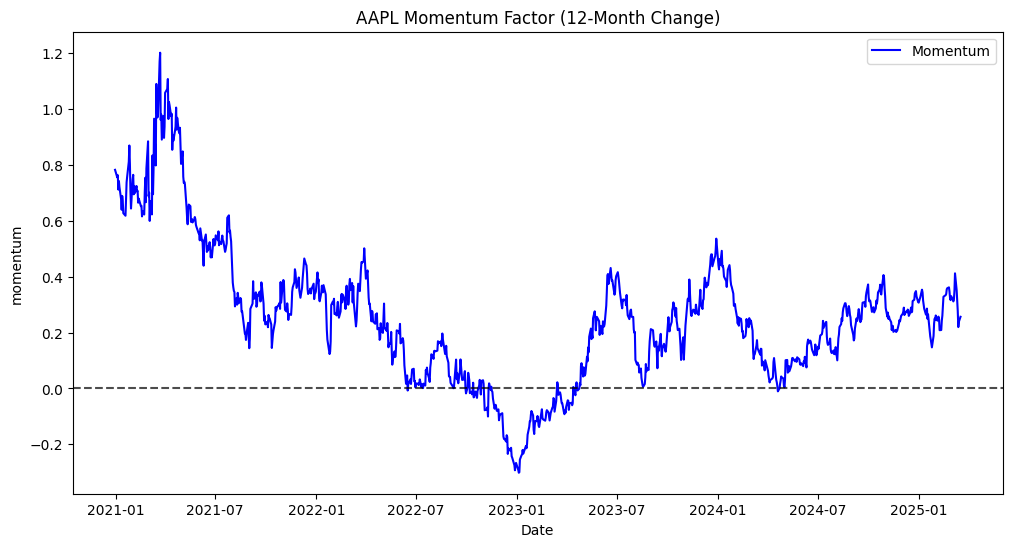

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.index, y='momentum', label='Momentum', color='b')
plt.axhline(0, linestyle='--', color='black', alpha=0.7)
plt.title(f'{stock} Momentum Factor (12-Month Change)')
plt.show()


## 📈 Calculate MACD (Moving Average Convergence Divergence)
MACD is calculated as the difference between:
- **Short-term EMA (12-day)**
- **Long-term EMA (26-day)**
A **signal line (9-day EMA of MACD)** is also calculated.


In [5]:
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['ema_short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['ema_long'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['macd'] = data['ema_short'] - data['ema_long']
    data['macd_signal'] = data['macd'].ewm(span=signal_window, adjust=False).mean()
    return data

# Apply function
data = calculate_macd(data)

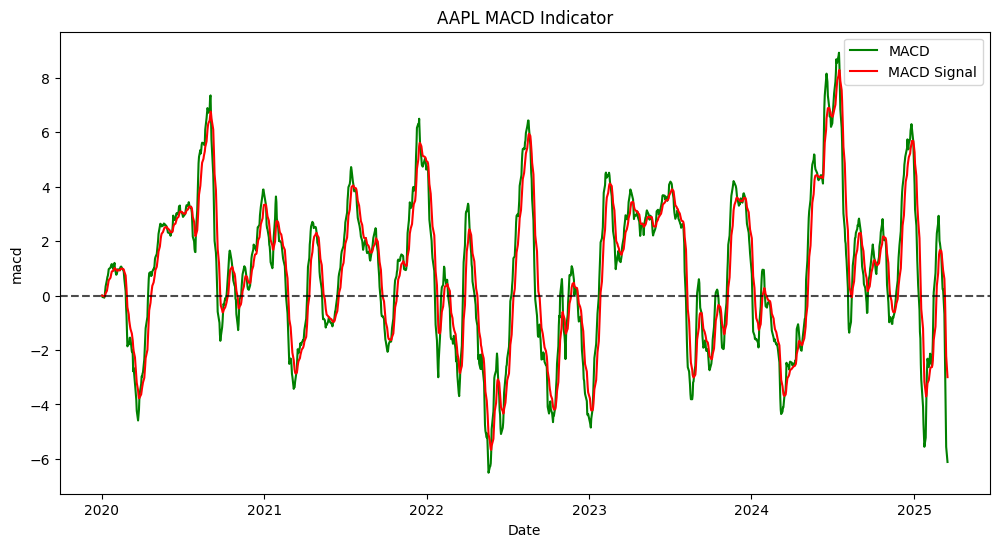

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.index, y='macd', label='MACD', color='g')
sns.lineplot(data=data, x=data.index, y='macd_signal', label='MACD Signal', color='r')
plt.axhline(0, linestyle='--', color='black', alpha=0.7)
plt.title(f'{stock} MACD Indicator')
plt.show()

## 📊 Calculate Volatility Factor
Volatility is computed as the **rolling standard deviation (30-day window)**.

In [7]:
def calculate_volatility(data, window=30):
    data['volatility'] = data['Close'].rolling(window=window).std()
    return data

# Apply function
data = calculate_volatility(data)

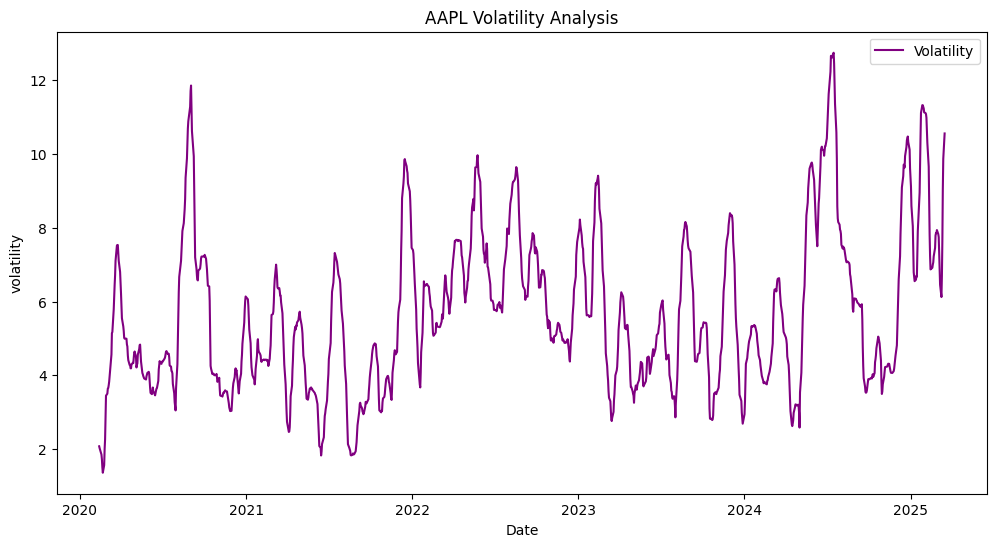

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.index, y='volatility', label='Volatility', color='purple')
plt.title(f'{stock} Volatility Analysis')
plt.show()

## 🎯 Alpha Research Class
The `AlphaResearch` class encapsulates all factor calculations and provides a streamlined interface.

In [9]:
class AlphaResearch:
    def __init__(self, ticker, start='2020-01-01', end='2025-03-18'):
        self.ticker = ticker
        self.data = yf.download(ticker, start=start, end=end)

    def calculate_momentum(self, period=252):
        self.data['momentum'] = self.data['Close'].pct_change(periods=period)

    def calculate_macd(self, short_window=12, long_window=26, signal_window=9):
        self.data['ema_short'] = self.data['Close'].ewm(span=short_window, adjust=False).mean()
        self.data['ema_long'] = self.data['Close'].ewm(span=long_window, adjust=False).mean()
        self.data['macd'] = self.data['ema_short'] - self.data['ema_long']
        self.data['macd_signal'] = self.data['macd'].ewm(span=signal_window, adjust=False).mean()

    def calculate_volatility(self, window=30):
        self.data['volatility'] = self.data['Close'].rolling(window=window).std()

    def run_analysis(self):
        self.calculate_momentum()
        self.calculate_macd()
        self.calculate_volatility()
        return self.data

## 🏆 Running Analysis using Object-Oriented Approach
We now create an **instance of `AlphaResearch` class** and invoke all calculations.


In [10]:
research = AlphaResearch('AAPL')
data = research.run_analysis()

[*********************100%***********************]  1 of 1 completed


## 📊 Visualizing MACD Using Class-Based Approach

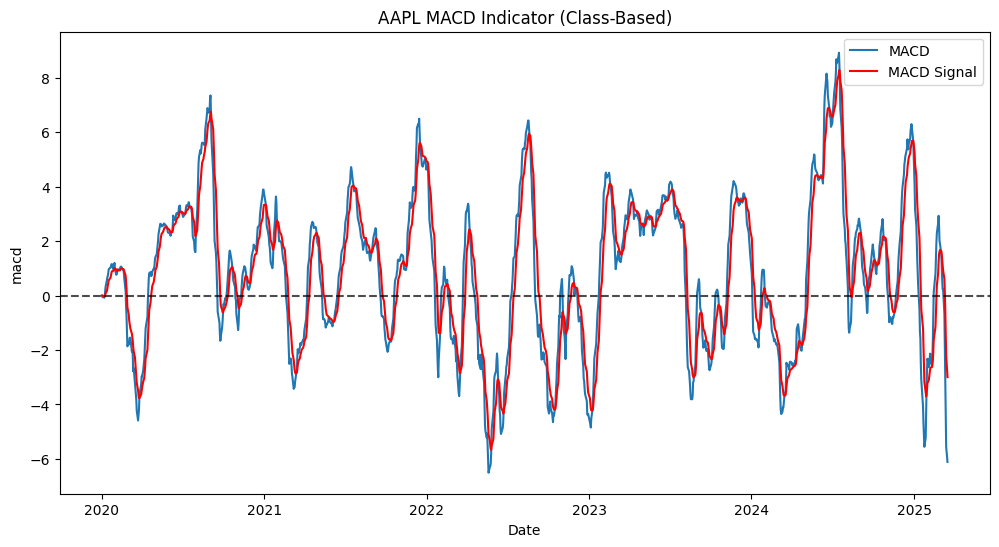

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.index, y='macd', label='MACD')
sns.lineplot(data=data, x=data.index, y='macd_signal', label='MACD Signal', color='r')
plt.axhline(0, linestyle='--', color='black', alpha=0.7)
plt.title(f'{stock} MACD Indicator (Class-Based)')
plt.show()

## 💾 Save Processed Data
We save the processed dataset for further research & backtesting.

In [12]:
data.to_csv(f"{stock}_alpha_factors.csv")
print(f"Processed data saved as {stock}_alpha_factors.csv")

Processed data saved as AAPL_alpha_factors.csv


3️⃣ Advanced Alpha Factors & Multi-Stock Analysis
We now define a new class with additional alpha factors such as:

- Relative Strength Index (RSI)
- Bollinger Bands
- Moving Averages

In [21]:
class AdvancedAlphaResearch:
    def __init__(self, ticker, start='2020-01-01', end='2025-03-18'):
        self.ticker = ticker
        self.data = yf.download(ticker, start=start, end=end)

    def calculate_rsi(self, period=14):
        delta = self.data['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        rs = gain / loss
        self.data['rsi'] = 100 - (100 / (1 + rs))

    def calculate_bollinger_bands(self, window=20):
        # Calculate the middle Bollinger Band
        self.data['bollinger_mid'] = self.data['Close'].rolling(window=window).mean()

        # Ensure standard deviation returns a single series
        rolling_std = self.data['Close'].rolling(window=window).std(ddof=0)

        # Calculate the upper and lower Bollinger Bands
        self.data['bollinger_upper'] = self.data['bollinger_mid'] + (2 * rolling_std)
        self.data['bollinger_lower'] = self.data['bollinger_mid'] - (2 * rolling_std)

    def calculate_moving_averages(self):
        self.data['ma_50'] = self.data['Close'].rolling(window=50).mean()
        self.data['ma_200'] = self.data['Close'].rolling(window=200).mean()

    def run_analysis(self):
        self.calculate_rsi()
        self.calculate_bollinger_bands()
        self.calculate_moving_averages()
        return self.data

In [22]:
tech_stocks = ['AAPL', 'NVDA', 'TSLA', 'GOOGL', 'IBM', 'MSFT']

for stock in tech_stocks:
    research = AdvancedAlphaResearch(stock)
    data = research.run_analysis()

    # Visualization for RSI
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x=data.index, y='rsi', label=f'{stock} RSI')
    plt.axhline(70, linestyle='--', color='r', alpha=0.7, label='Overbought')
    plt.axhline(30, linestyle='--', color='g', alpha=0.7, label='Oversold')
    plt.title(f'{stock} RSI Indicator')
    plt.legend()
    plt.show()

    # Visualization for Bollinger Bands
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x=data.index, y='Close', label='Close Price')
    sns.lineplot(data=data, x=data.index, y='bollinger_upper', label='Upper Band', color='r')
    sns.lineplot(data=data, x=data.index, y='bollinger_lower', label='Lower Band', color='g')
    plt.title(f'{stock} Bollinger Bands')
    plt.legend()
    plt.show()


[*********************100%***********************]  1 of 1 completed


ValueError: Cannot set a DataFrame with multiple columns to the single column bollinger_upper